In [14]:
import xarray as xr
import pandas as pd
mmij = xr.open_dataset('/home/peter/Cartesius/Chapter2/Data/MMIJ/mmij_clean.nc')
mmij # This prints an object of type: <xarray.Dataset> 

<xarray.Dataset>
Dimensions:      (height: 12, time: 210384)
Coordinates:
  * time         (time) datetime64[ns] 2012-01-01 2012-01-01T00:10:00 ...
  * height       (height) float64 27.0 58.0 89.0 115.0 140.0 165.0 190.0 ...
Data variables:
    wspd         (time, height) float64 ...
    wdir         (time, height) float64 ...
    wstd         (time, height) float64 ...
    Rho21        (time) float64 ...
    P21          (time) float64 ...
    RH21         (time) float64 ...
    T21          (time) float64 ...
    Rho90        (time) float64 ...
    P90          (time) float64 ...
    RH90         (time) float64 ...
    T90          (time) float64 ...
    SST          (time) float64 ...
    SLP          (time) float64 ...
    PT90         (time) float64 ...
    PT21         (time) float64 ...
    PT0          (time) float64 ...
    SVP90        (time) float64 ...
    SVP21        (time) float64 ...
    SVP0         (time) float64 ...
    SMR90        (time) float64 ...
    SMR21      

In [13]:
mmij.wspd # This prints an object of type: <xarray.DataArray> 

<xarray.DataArray 'wspd' (time: 210384, height: 12)>
[2524608 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T00:10:00 ...
  * height   (height) float64 27.0 58.0 89.0 115.0 140.0 165.0 190.0 215.0 ...

In [10]:
mmij.wspd.sel(height=27) # This prints an object of type: <xarray.DataArray> 

<xarray.DataArray 'wspd' (time: 210384)>
[210384 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2012-01-01 2012-01-01T00:10:00 ...
    height   float64 27.0

In [11]:
mmij.wspd.sel(height=27).groupby('time.season') # This prints an object of type: <xarray....Groupby> 

In [12]:
mmij.wspd.sel(height=27).groupby('time.season').mean() # This prints an object of type: <xarray.DataArray> 

<xarray.DataArray 'wspd' (season: 4)>
array([10.954881,  7.110926,  8.096389,  9.20328 ])
Coordinates:
    height   float64 27.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

# YOUR CONFUSION ARISES HERE!!!
groupby(...) returns grouped data, so ALL values in a given season. This can be used to make boxplots.

groupby().mean() aggregates the grouped data, by computing the mean of each group, leaving you with only one value per season. This cannot be used to make boxplots.

pandas should be able to create boxplots based on the grouped() object. Let's try that for xarray:

In [17]:
mmij.wspd.sel(height=27).groupby('time.season').boxplot() 

AttributeError: 'DataArrayGroupBy' object has no attribute 'boxplot'

Apparently, xarray cannot do this. So let's try it in pandas:

In [71]:
mmij.wspd.sel(height=27).to_dataframe() # This prints a pandas.Series object

,height,wspd
time,,
2012-01-01 00:00:00,27.0,12.24590
2012-01-01 00:10:00,27.0,13.18670
2012-01-01 00:20:00,27.0,13.44740
2012-01-01 00:30:00,27.0,13.95770
2012-01-01 00:40:00,27.0,13.38290
2012-01-01 00:50:00,27.0,13.38070
2012-01-01 01:00:00,27.0,13.48100
2012-01-01 01:10:00,27.0,13.16870
2012-01-01 01:20:00,27.0,12.65880


In [72]:
mmij.wspd.sel(height=27).to_dataframe().groupby('time.season') 

KeyError: 'time.season'

In [ ]:
Apparently, pandas cannot groupby seasons so easily. A bit of trying:

In [74]:
# let's give the pandas dataframe a name:
df = mmij.wspd.sel(height=27).to_dataframe()

In [75]:
# This works to get the month out of the index
df.index.month

Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name=u'time', length=210384)

In [47]:
month_num_to_season =   { 1:'DJF',  2:'DJF', 
                          3:'MAM',  4:'MAM',  5:'MAM', 
                          6:'JJA',  7:'JJA',  8:'JJA',
                          9:'SON', 10:'SON', 11:'SON',
                         12:'DJF'}

# e.g.
month_num_to_season.get(4)

'MAM'

In [76]:
df['season'] = [month_num_to_season.get(i) for i in df.index.month]
df.head()

,height,wspd,season
time,,,
2012-01-01 00:00:00,27.0,12.2459,DJF
2012-01-01 00:10:00,27.0,13.1867,DJF
2012-01-01 00:20:00,27.0,13.4474,DJF
2012-01-01 00:30:00,27.0,13.9577,DJF
2012-01-01 00:40:00,27.0,13.3829,DJF


In [77]:
grouped = df.groupby(seasons)

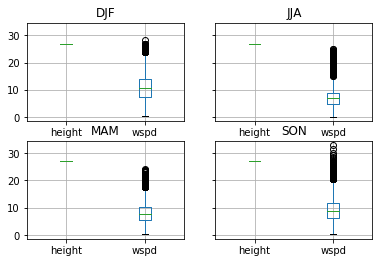

In [78]:
grouped.boxplot()
plt.show()

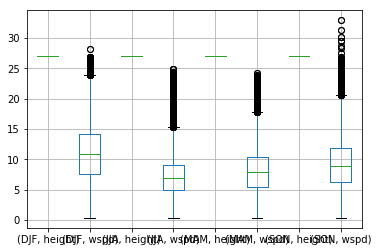

In [80]:
grouped.boxplot(subplots=False)
plt.show()

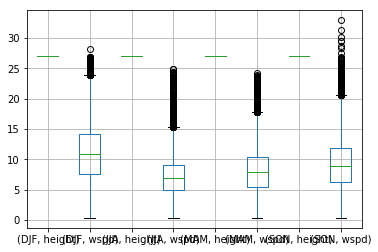

In [82]:
# to get rid of the height:
df.groupby(seasons).boxplot(subplots=False)
plt.show()

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# Alternatively, use the xarray route
use groupby season to compute mean and limits etc., then plot it from those stats

In [95]:
# from: https://stackoverflow.com/a/47103407/6012085
q50 = mmij.wspd.sel(height=27).groupby('time.season').reduce(np.nanpercentile, dim='time', q=0.50) #=median
q75 = mmij.wspd.sel(height=27).groupby('time.season').reduce(np.nanpercentile, dim='time', q=0.75)
q25 = mmij.wspd.sel(height=27).groupby('time.season').reduce(np.nanpercentile, dim='time', q=0.25)
q99 = mmij.wspd.sel(height=27).groupby('time.season').reduce(np.nanpercentile, dim='time', q=0.99)
q01 = mmij.wspd.sel(height=27).groupby('time.season').reduce(np.nanpercentile, dim='time', q=0.01)
#e.g.
q01

<xarray.DataArray 'wspd' (season: 4)>
array([0.435084, 0.336878, 0.341583, 0.352606])
Coordinates:
    height   float64 27.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

Then it is possible to manually construct the boxplot like so:
source: https://stackoverflow.com/a/35325221/6012085

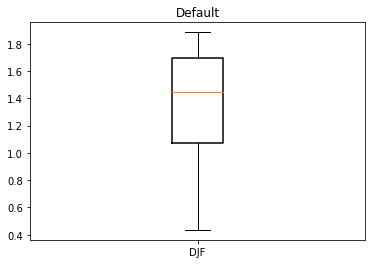

In [103]:
item = {}

item["label"] = 'DJF' # not required
# item["mean"] = 5 # not required
item["med"] = q50[0].values
item["q1"] = q25[0].values
item["q3"] = q75[0].values
#item["cilo"] = 5.3 # not required
#item["cihi"] = 5.7 # not required
item["whislo"] = q01[0].values # required      NOTE that this is normally Q25 - 3*IQR (or the minimum if it is lower)
item["whishi"] = q99[0].values # required      NOTE that this is normally Q75 + 3*IQR (or the maximum, if it is higher)
item["fliers"] = [] # required if showfliers=True

stats = [item]

fig, axes = plt.subplots(1, 1)
axes.bxp(stats)
axes.set_title('Default')
# y_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y_values = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
# plt.yticks(y_axis, y_values)
plt.show()

with a little playing around this should also work if you pass all the seasons at once (q50.values instead of q50[0].values) and pass the labels as q50.season.values

In [102]:
q50.season.values

array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)

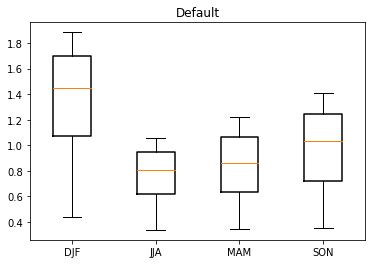

In [110]:
stats = []
for i in range(4):

    item = {}

    item["label"] = q50[i].season.values # not required
    # item["mean"] = 5 # not required
    item["med"] = q50[i].values
    item["q1"] = q25[i].values
    item["q3"] = q75[i].values
    #item["cilo"] = 5.3 # not required
    #item["cihi"] = 5.7 # not required
    item["whislo"] = q01[i].values # required      NOTE that this is normally Q25 - 3*IQR (or the minimum if it is lower)
    item["whishi"] = q99[i].values # required      NOTE that this is normally Q75 + 3*IQR (or the maximum, if it is higher)
    item["fliers"] = [] # required if showfliers=True

    stats.append(item)

fig, axes = plt.subplots(1, 1)
axes.bxp(stats)
axes.set_title('Default')
# y_axis = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# y_values = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]
# plt.yticks(y_axis, y_values)
plt.show()